In [232]:
import pandas as pd
import numpy as np
import requests
import json

## Gather

In [233]:
# reading twitter_archive
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [234]:
# downloading image-predictions.tsv from a website using requests library
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [235]:
with open('image-predictions.tsv', 'wb') as file:
    file.write(response.content)
    
image_predictions =  pd.read_csv('image-predictions.tsv', sep='\t')

assuming we got twitter api json response and stored it into the text file `tweet-json.txt`

In [236]:
# reading the text file as json

tweet_file = open('tweet-json.txt', "r")

data = []
for line in tweet_file:
    try:
        tweet = json.loads(line)
        data.append(tweet)
    except:
        continue
        
tweet_file.close()

In [237]:
tweet_info_list = []

for entry in data:
    tweet_info_list.append({
        'tweet_id': entry['id'],
        'retweets': entry['retweet_count'],
        'favorites': entry['favorite_count']
    })

tweet_info = pd.DataFrame(tweet_info_list, columns=['tweet_id', 'retweets', 'favorites'])

Gathered data:
- `twitter_archive` dataframe contains basic info about tweets
- `image-predictions` dataframe contains predictions about images in those tweets
- `tweet-info` dataframe contains tweets information such as number of retweets, likes, etc..

## Assess

Note: issues found are documented at the end of the assessment section 

### Visual assessment

In [238]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [239]:
twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,None,None,None,None


In [240]:
twitter_archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [241]:
twitter_archive.shape

(2356, 17)

In [242]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [243]:
image_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [244]:
image_predictions.shape

(2075, 12)

In [245]:
tweet_info.head()

,tweet_id,retweets,favorites
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [246]:
tweet_info.tail()

,tweet_id,retweets,favorites
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


In [247]:
tweet_info.shape

(2354, 3)

### Programmatic Assessment

In [248]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [249]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [250]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [251]:
twitter_archive.rating_denominator.value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [252]:
twitter_archive.tweet_id.duplicated().sum()

0

In [253]:
twitter_archive.name.value_counts()

None            745
a               55 
Charlie         12 
Cooper          11 
Oliver          11 
Lucy            11 
Penny           10 
Lola            10 
Tucker          10 
Bo              9  
Winston         9  
the             8  
Sadie           8  
Buddy           7  
an              7  
Daisy           7  
Bailey          7  
Toby            7  
Scout           6  
Koda            6  
Rusty           6  
Leo             6  
Jax             6  
Milo            6  
Bella           6  
Dave            6  
Jack            6  
Oscar           6  
Stanley         6  
Gus             5  
               ..  
Lance           1  
Rooney          1  
Fiji            1  
Mimosa          1  
Wiggles         1  
Striker         1  
Mairi           1  
Barclay         1  
Brian           1  
Apollo          1  
Sweets          1  
Mya             1  
Jim             1  
Kramer          1  
Sky             1  
Bobbay          1  
Dook            1  
Alexanderson    1  
Orion           1  


In [254]:
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id     2354 non-null int64
retweets     2354 non-null int64
favorites    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [255]:
tweet_info.describe()

,tweet_id,retweets,favorites
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [256]:
tweet_info.isnull().sum()

tweet_id     0
retweets     0
favorites    0
dtype: int64

In [257]:
tweet_info.tweet_id.duplicated().sum()

0

In [258]:
twitter_archive.shape[0] - tweet_info.shape[0]

2

In [259]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [260]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [261]:
image_predictions.tweet_id.duplicated().sum()

0

In [262]:
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

### Quality
##### `twitter_archive`
- 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id' are of type float, they should be string or integers
- 'timestamp','retweeted_status_timestamp' should be of type datetime
- Missing values in dog stage columns have "None" instade of NaN
- 'rating_numerator' and 'rating_denominator' has some invalid values like 0, 1776 or 170
- Invalid names or "None" found in 'name' column for many dogs, like a, an, the, such, etc.. 
- Not all 'text' column content is shown, the endings are truncated 
- 'source' column has extra text that makes it less readable
- Has missing values in colmun 'expanded_urls'

##### `tweet_info`
- 2 tweet_id information are missing

### Tidiness
- In `twitter_archive` dog stages are poorly structured into multiple columns, where one column is enough
- `tweet_info` and `image_predictions` can be merged with `twitter_archive` 

## Claen

In [263]:
twitter_archive_clean = twitter_archive.copy()
tweet_info_clean = tweet_info.copy()
image_predictions_clean = image_predictions.copy()

### Solving `Tidiness` issues

#### Define

- Merge the dog stages columns (i.e. 'doggo', 'floofer', 'pupper', 'puppo') into one column

#### Code

In [264]:
twitter_archive_clean['dog_stage'] = twitter_archive_clean['text'].str.extract('(puppo|pupper|floofer|doggo)', expand=True)
columns = ['doggo', 'floofer', 'pupper', 'puppo']
twitter_archive_clean = twitter_archive_clean.drop(columns, axis=1)
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN


#### test

In [265]:
columns = ['pupper', 'doggo', 'puppo', 'floofer']
tot_num = 0
for col in columns:
    print(col, twitter_archive[col].value_counts()[1])

pupper 257
doggo 97
puppo 30
floofer 10


In [266]:
twitter_archive_clean['dog_stage'].value_counts()

pupper     265
doggo      93 
puppo      37 
floofer    4  
Name: dog_stage, dtype: int64

In [267]:
twitter_archive_clean.dog_stage.head(15)

0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN  
5     NaN  
6     NaN  
7     NaN  
8     NaN  
9     doggo
10    NaN  
11    NaN  
12    puppo
13    NaN  
14    puppo
Name: dog_stage, dtype: object

#### Define

- Merge `tweet_info` and `image_predictions` with `twitter_archive`

#### Code

In [268]:
twitter_archive_clean = pd.merge(twitter_archive_clean, image_predictions_clean, how='left', on='tweet_id')
twitter_archive_clean = pd.merge(twitter_archive_clean, tweet_info_clean, how='left', on='tweet_id')

#### test

In [269]:
twitter_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'retweets', 'favorites'],
      dtype='object')

In [270]:
twitter_archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweets,favorites
522,809808892968534016,NaN,NaN,2016-12-16 17:14:20 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Maximus. His face is stuck like that. Tragic really. Great tongue tho. 12/10 would pet firmly https://t.co/xIfrsMNLBR,7.939622e+17,4.196984e+09,2016-11-02 23:45:19 +0000,"https://twitter.com/dog_rates/status/793962221541933056/photo/1,https://twitter.com/dog_rates/status/793962221541933056/photo/1,https://twitter.com/dog_rates/status/793962221541933056/photo/1,https://twitter.com/dog_rates/status/793962221541933056/photo/1",...,0.861651,True,golden_retriever,0.044462,True,Staffordshire_bullterrier,0.016497,True,5711.0,0.0
1865,675354435921575936,NaN,NaN,2015-12-11 16:40:19 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Everyone needs to watch this. 13/10 https://t.co/Bb3xnpsWBC,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675354435921575936/video/1,...,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True,18963.0,35178.0
491,813800681631023104,NaN,NaN,2016-12-27 17:36:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sky. She's learning how to roll her R's. 12/10 cultured af https://t.co/OuaVvVkwJ1,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813800681631023104/photo/1,...,0.501159,True,Siberian_husky,0.228792,True,Eskimo_dog,0.200388,True,2060.0,9300.0
2273,667470559035432960,NaN,NaN,2015-11-19 22:32:36 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This is a northern Wahoo named Kohl. He runs this town. Chases tumbleweeds. Draws gun wicked fast. 11/10 legendary https://t.co/J4vn2rOYFk,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667470559035432960/photo/1,...,0.304175,True,pug,0.223427,True,Lakeland_terrier,0.073316,True,102.0,273.0
2152,669680153564442624,NaN,NaN,2015-11-26 00:52:45 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Shawwn. He's a Turkish Gangrene Robitussin. Spectacular tongue. Cranks out push-ups. 8/10 #NoDaysOff #swole https://t.co/IQFZKNUlXx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669680153564442624/photo/1,...,0.141257,True,borzoi,0.137744,True,Labrador_retriever,0.103792,True,311.0,712.0


### Solving `Quality` issues

#### Define

- Make 'tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id' integers or strings instead of float

#### Code

In [271]:
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype('str')
twitter_archive_clean.in_reply_to_status_id = twitter_archive_clean.in_reply_to_status_id.astype('str')
twitter_archive_clean.in_reply_to_user_id = twitter_archive_clean.in_reply_to_user_id.astype('str')
twitter_archive_clean.retweeted_status_id = twitter_archive_clean.retweeted_status_id.astype('str')
twitter_archive_clean.retweeted_status_user_id = twitter_archive_clean.retweeted_status_user_id.astype('str')

#### Test

In [272]:
twitter_archive_clean.dtypes

tweet_id                      object 
in_reply_to_status_id         object 
in_reply_to_user_id           object 
timestamp                     object 
source                        object 
text                          object 
retweeted_status_id           object 
retweeted_status_user_id      object 
retweeted_status_timestamp    object 
expanded_urls                 object 
rating_numerator              int64  
rating_denominator            int64  
name                          object 
dog_stage                     object 
jpg_url                       object 
img_num                       float64
p1                            object 
p1_conf                       float64
p1_dog                        object 
p2                            object 
p2_conf                       float64
p2_dog                        object 
p3                            object 
p3_conf                       float64
p3_dog                        object 
retweets                      float64
favorites   

#### Define

- Change 'timestamp' and 'retweeted_status_timestamp' to datetime type

#### Code

In [273]:
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)
twitter_archive_clean.retweeted_status_timestamp = pd.to_datetime(twitter_archive_clean.retweeted_status_timestamp)

#### Test

In [274]:
twitter_archive_clean.dtypes

tweet_id                      object        
in_reply_to_status_id         object        
in_reply_to_user_id           object        
timestamp                     datetime64[ns]
source                        object        
text                          object        
retweeted_status_id           object        
retweeted_status_user_id      object        
retweeted_status_timestamp    datetime64[ns]
expanded_urls                 object        
rating_numerator              int64         
rating_denominator            int64         
name                          object        
dog_stage                     object        
jpg_url                       object        
img_num                       float64       
p1                            object        
p1_conf                       float64       
p1_dog                        object        
p2                            object        
p2_conf                       float64       
p2_dog                        object        
p3        

#### Define

- Make missing values in dog stage columns have NaN instade of "None"

#### Code

In [275]:
twitter_archive_clean.dog_stage.head(10)

0    NaN  
1    NaN  
2    NaN  
3    NaN  
4    NaN  
5    NaN  
6    NaN  
7    NaN  
8    NaN  
9    doggo
Name: dog_stage, dtype: object

It has been solved when we merged the four dog stge columns (i.e. 'pupper', 'doggo', 'puppo', 'floofer') into the 'dog_stage' column

#### Test

In [276]:
twitter_archive_clean.dog_stage.isnull().sum()

1957

#### Define

- Discover the reasons for the invalid 'rating_numerator' and 'rating_denominator' values like 0, 1776 or 170, etc.. and fix them

#### Code

In [277]:
twitter_archive_clean.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [278]:
twitter_archive_clean.rating_denominator.value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

As we can see, all 'rating_numerator' and 'rating_denominator' with counts less than or equal 3 are invalid

In [279]:
twitter_archive_clean.rating_numerator.value_counts().loc[lambda x : x <= 3].sum()

30

In [280]:
twitter_archive_clean.rating_denominator.value_counts().loc[lambda x : x <= 3].sum()

23

we have 53 records with invalid ratings, since this is a very small portion, it won't affect our analysis if we just dropped them 

In [281]:
numerators_to_delete = twitter_archive_clean.rating_numerator.value_counts().loc[lambda x : x <= 3]
for numerator in numerators_to_delete.index:
    twitter_archive_clean.drop(twitter_archive_clean.query('rating_numerator == ' + str(numerator)).index, inplace=True)
    
denominator_to_delete = twitter_archive_clean.rating_denominator.value_counts().loc[lambda x : x <= 3]
for denominator in denominator_to_delete.index:
    twitter_archive_clean.drop(twitter_archive_clean.query('rating_denominator == ' + str(denominator)).index, inplace=True)

#### Test

In [282]:
twitter_archive_clean.rating_numerator.value_counts()

12    558
11    463
10    461
13    351
9     156
8     102
7     54 
14    54 
5     37 
6     32 
3     19 
4     15 
2     9  
1     8  
Name: rating_numerator, dtype: int64

In [283]:
twitter_archive_clean.rating_denominator.value_counts()

10    2319
Name: rating_denominator, dtype: int64

In [284]:
twitter_archive_clean[['rating_denominator', 'rating_numerator']].describe()

,rating_denominator,rating_numerator
count,2319.0,2319.000000
mean,10.0,10.709789
std,0.0,2.151678
min,10.0,1.000000
25%,10.0,10.000000
50%,10.0,11.000000
75%,10.0,12.000000
max,10.0,14.000000


we only have valid ratings now

#### Define

- 2 tweet_id information are missing

#### Code

In [285]:
twitter_archive_clean.retweets.isnull().sum(), twitter_archive_clean.favorites.isnull().sum()

(2, 2)

In [286]:
twitter_archive_clean[twitter_archive_clean['retweets'].isnull()].tweet_id

19     888202515573088257
815    771004394259247104
Name: tweet_id, dtype: object

In [287]:
twitter_archive_clean[twitter_archive_clean['favorites'].isnull()].tweet_id

19     888202515573088257
815    771004394259247104
Name: tweet_id, dtype: object

In [288]:
# only 2 rows, we will just drop them
twitter_archive_clean.dropna(subset=['retweets'], inplace=True)

#### Test

In [289]:
twitter_archive_clean.retweets.isnull().sum(), twitter_archive_clean.favorites.isnull().sum()

(0, 0)

#### Define

- Display all 'text' column content

#### Code

In [290]:
twitter_archive_clean.text.head()

0    This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU                                                     
1    This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV
2    This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB                 
3    This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ                                                           
4    This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f
Name: text, dtype: object

In [291]:
# Set column width to infinite so entire content of 'text' column is displayed
pd.set_option('display.max_colwidth', -1)

#### Test

In [292]:
twitter_archive_clean.text.head()

0    This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU                                                     
1    This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV
2    This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB                 
3    This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ                                                           
4    This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f
Name: text, dtype: object

#### Define

- Make 'source' column more readable

#### Code

In [293]:
twitter_archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2183
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    10  
Name: source, dtype: int64

In [294]:
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone')
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine')
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')

#### Test

In [295]:
twitter_archive_clean.source.value_counts()

Twitter for iPhone    2183
Vine                  91  
Twitter Web Client    33  
TweetDeck             10  
Name: source, dtype: int64

#### Define

- Handle the missing values in colmun 'expanded_urls'

#### Code

In [296]:
twitter_archive_clean.expanded_urls.isnull().sum()

50

In [297]:
# since only 50 tweets doesn't have 'expanded_urls', we'll just drop them
twitter_archive_clean.dropna(subset=['expanded_urls'], inplace=True)

#### Test

In [298]:
twitter_archive_clean.expanded_urls.isnull().sum()

0

## Store

In [299]:
twitter_archive_clean.to_csv('twitter_archive_master.csv', index=False)

## Analyze

In [300]:
import matplotlib.pyplot as plt
%matplotlib inline

In [301]:
df = twitter_archive_clean.copy()
df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweets,favorites
0,892420643555336193,nan,nan,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,nan,nan,NaT,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853.0,39467.0
1,892177421306343426,nan,nan,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",nan,nan,NaT,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514.0,33819.0


##### Let's check the retweets and likes over time

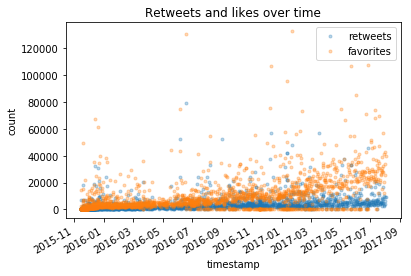

In [309]:
df_time_indexed = df.set_index('timestamp')
df_time_indexed[['retweets', 'favorites']].plot(alpha=0.3, style='.')
plt.xlabel('timestamp')
plt.ylabel('count')
plt.savefig('retweets_favorites_over_time.png')
plt.title('Retweets and likes over time');

As we can see, retweets and favorites increase over time

##### Let's check the given rating ratios over time

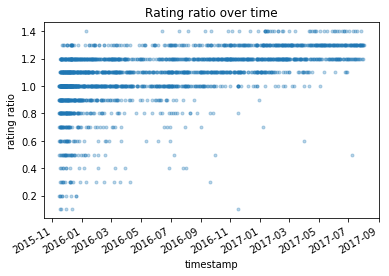

In [310]:
df_time_indexed['rating_ratio'] = df_time_indexed['rating_numerator'] / df_time_indexed['rating_denominator']
df_time_indexed['rating_ratio'].plot(alpha=0.3, style='.')
plt.xlabel('timestamp')
plt.ylabel('rating ratio')
plt.savefig('ratings_over_time.png')
plt.title('Rating ratio over time');

Also, rating ratios increase over time

##### Let's check if the dog stages affect the rating ratios

In [304]:
df_time_indexed.groupby('dog_stage')['rating_ratio'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_stage,,,,,,,,
doggo,89.0,1.160674,0.162101,0.5,1.100,1.20,1.3,1.4
floofer,4.0,1.225000,0.095743,1.1,1.175,1.25,1.3,1.3
pupper,255.0,1.070588,0.182388,0.3,1.000,1.10,1.2,1.4
puppo,34.0,1.217647,0.111384,0.9,1.200,1.20,1.3,1.4


The means in the above table seem to indicate a low rating ratio for "pupper" dog stage, but that might be affected by the low outliers and high number of them, however, the medians also indicate the same thing, so the outliers are not the problem, therefore, we can conclude that the "pupper" dog stage tends to get less rating ratios.

The "floofer" dog stage gets the highest rating ratios among other stages, with always getting higher than 10 rating ratio, but that also might be due to the very few number of dogs at this stage. 

In [312]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'wrangle_act.ipynb'])

0